In [96]:
import pandas as pd
import numpy as np

In [97]:
df  = pd.read_csv('placement.csv')

In [98]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [99]:
df.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [101]:

df.shape

(100, 4)

In [102]:
df = df.iloc[:,1:]

In [103]:

df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


 Steps

0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model
     

In [104]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model
     

In [105]:
import matplotlib.pyplot as plt

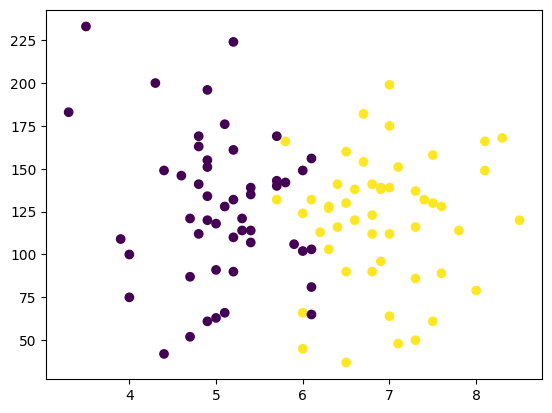

In [106]:
plt.scatter(df['cgpa'],df['iq'], c = df['placement'])

In [107]:

X = df.iloc[:,0:2]
y = df.iloc[:,-1]


In [108]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [109]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [111]:
X_train.shape


(90, 2)

In [112]:
y_train.shape

(90,)

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()

In [115]:
X_train = scaler.fit_transform(X_train)

In [116]:
X_train

array([[ 1.47931565e+00,  1.29988888e-01],
       [-6.45724874e-01, -4.53708537e-02],
       [ 8.32564186e-01,  4.05554196e-01],
       [ 9.34196559e-02, -4.96295903e-01],
       [-7.38117940e-01,  2.30194454e-01],
       [-1.20008327e+00, -1.77391688e+00],
       [ 9.24957252e-01,  1.30740429e+00],
       [ 1.85812722e-01, -2.45781987e-01],
       [-1.20008327e+00, -8.97118169e-01],
       [-1.01529714e+00, -7.04222454e-02],
       [ 9.24957252e-01, -2.70833378e-01],
       [-1.29247634e+00,  5.80913937e-01],
       [ 1.01735032e+00,  7.06170895e-01],
       [ 1.29452952e+00,  2.30194454e-01],
       [-1.47726247e+00,  6.56068112e-01],
       [ 1.66410178e+00, -2.20730595e-01],
       [-9.13664766e-02, -4.21141728e-01],
       [-7.38117940e-01,  9.56684812e-01],
       [ 1.02658963e-03, -5.21347295e-01],
       [-1.93922780e+00, -3.45987553e-01],
       [-1.01529714e+00,  7.06170895e-01],
       [-8.30511007e-01,  1.29988888e-01],
       [ 1.01735032e+00, -1.87412244e+00],
       [-1.

In [117]:
X_test = scaler.fit_transform(X_test)

In [118]:

X_test

array([[ 0.5680849 , -0.20032792],
       [ 0.89086041,  0.17361753],
       [ 1.40730123,  0.9482188 ],
       [ 1.01997062, -1.85637202],
       [-1.69134368,  1.40229541],
       [-0.72301715,  0.28045908],
       [-0.72301715, -0.49414219],
       [-0.14202122,  1.02834997],
       [ 0.63264   ,  0.20032792],
       [-1.23945796, -1.48242658]])

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
clf =LogisticRegression()

In [121]:
clf.fit(X_train,y_train)

LogisticRegression()

In [122]:
y_pred= clf.predict(X_test)


In [123]:
y_test

0     1
61    1
65    1
44    1
17    0
51    0
59    0
84    0
11    1
68    0
Name: placement, dtype: int64

In [124]:


from sklearn.metrics import accuracy_score


In [125]:
accuracy_score(y_test,y_pred)

1.0

In [129]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

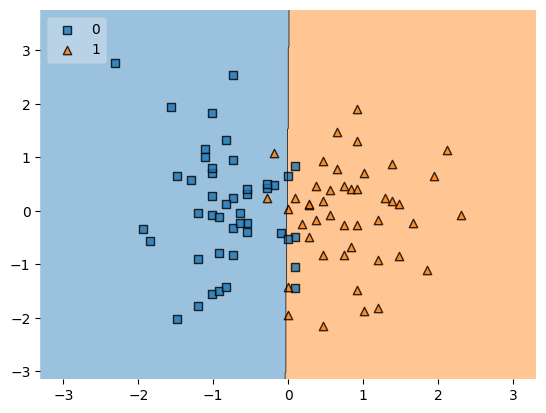

In [132]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [134]:
import pickle

In [137]:
import pickle

# Save the model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)

# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)